In [1]:
import matplotlib.pyplot as plt
import math
import matplotlib.patches as patches
import numpy as np

In [4]:
class World:
    def __init__(self):
        self.objects = [] # ここにロボットなどのオブジェクトを登録
    
    def append(self,obj): #オブジェクトを登録するための関数
        self.objects.append(obj)
    
    def draw(self):
        # fig は、画像全体の入れ物みたいな位置づけで
        # その中に座標系を描くには、サブプロットというオブジェクトを作る必要がある
        # add_subplotの引数(111)は、「figの中にサブプロットを1行1列で並べて、今作っているのはその1番目だ」という意味
        # つまりfig中に唯一のサブプロットを作っているという意味
        fig = plt.figure(figsize=(8,8)) #8*8inchの図を準備
        ax = fig.add_subplot(111) #サブプロットを準備
        ax.set_aspect("equal") #縦横比を座標の値と一致させる
        ax.set_xlim(-5,5) #X軸を-5から5の範囲
        ax.set_ylim(-5,5) #Y軸を-5から5の範囲
        ax.set_xlabel("X",fontsize=20) #X軸ラベル設定
        ax.set_ylabel("Y",fontsize=20) #Y軸ラベル設定
        
        for obj in self.objects:
            obj.draw(ax) #appendした物体を次々に描画
        
        plt.show()

In [6]:
class IdealRobot:
    def __init__(self,pose,color="black"):
        self.pose = pose #引数から姿勢の初期値を設定
        self.r = 0.2 #描画のための初期値
        self.color = color #引数から描画するときの色を設定
    
    def draw(self,ax):
        x,y,theta = self.pose #姿勢の変数を分解して3つの変数へ
        xn = x + self.r * math.cos(theta) #ロボットの鼻先のX座標
        yn = y + self.r * math.sin(theta) #ロボットの鼻先のY座標
        ax.plot([x,xn],[y,yn],color=self.color) #ロボットの向きを表す線分の描画
        c = patches.Circle(xy=(x,y),radius=self.r,fill=False,color=self.color)
        ax.add_patch(c) #上のpatches.Circleでロボットの胴体を表す円を作ってサブプロットへ登録

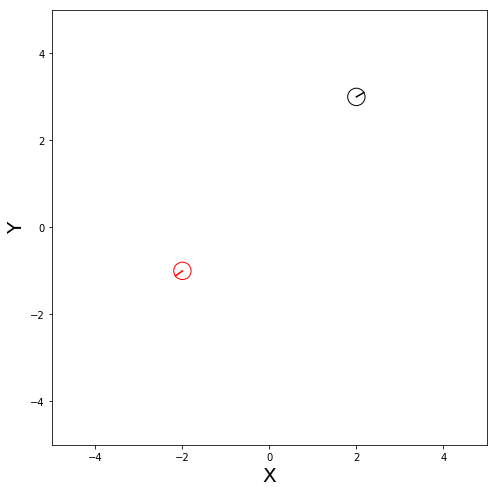

In [9]:
world = World()

robot1 = IdealRobot(np.array([2,3,math.pi/6]).T) #ロボットのインスタンス作成（色は省略）
robot2 = IdealRobot(np.array([-2,-1,math.pi/5*6]).T,"red") #ロボットのインスタンス作成（赤色指定）

#ロボット登録
world.append(robot1)
world.append(robot2)

world.draw()